# Analysing the fungi-plant mono-association experiments

In [56]:
import pandas as pd
%reload_ext rpy2.ipython

def getFullName(df, col):
    mapping=pd.read_csv('/biodata/dep_psl/grp_hacquard/Fantin/jgi42/mapping.csv',header=None).set_index(0)[1].to_dict()
    mapping['MOCK']='MOCK'
    for i in df.index:
        df.loc[i,col]=mapping[df.loc[i,col]]
    return df

In [57]:
sfw=pd.read_csv('/biodata/dep_psl/grp_hacquard/Fantin/gitSFW.csv').set_index('Unnamed: 0')

df=[]
for plate in set(sfw['plate']):
    dfPlate=sfw[sfw['plate']==plate]
    #germinationRate=(len(dfPlate)-len(dfPlate[dfPlate['value']==0]))/len(dfPlate)
    #averageWeight=sum(list(dfPlate['value']))/(0.0001+len(dfPlate[dfPlate['value']>0]))
    #index=germinationRate*averageWeight
    index=sum(list(dfPlate['weight']))/len(dfPlate)
    df.append({'value':index, 'plate':plate,'treatment':list(dfPlate['treatment'])[0], 'phosphate':list(dfPlate['phosphate'])[0][:2],'replicate':list(dfPlate['replicate'])[0][:8]})
DF=pd.DataFrame(df)

In [58]:
# Drop contaminated fungi
idxToDel=DF[(DF['replicate']=='A') & (DF['treatment'].isin(['9','66','42','83','243']))].index
DF.drop(idxToDel, inplace=True)

# Low Phosphate

In [59]:
lowP=getFullName(DF[DF['phosphate']=='P-'],'treatment')

#### Testing fungus influence on Plant Performance by Kruskal-Wallis

In [60]:
%%R -i lowP -o D
lowP$treatment <- as.factor(lowP$treatment)
library(DescTools)
K=kruskal.test(value ~ treatment, data = lowP)
D=DunnTest(value ~ treatment, data = lowP, method='BH')
print(K)


	Kruskal-Wallis rank sum test

data:  value by treatment
Kruskal-Wallis chi-squared = 254.65, df = 42, p-value < 2.2e-16



#### Returning fungus which outcome is different from Mock (Dunn's test)

In [61]:
print('\n'.join([a for a in str(D).split('\n') if 'MOCK' in a and '*' in a]))
signifPm=[a.split(' ')[0].replace('MOCK-','').replace('-MOCK','') for a in str(D).split('\n') if 'MOCK' in a and '*' in a]

MOCK-Chaetomium_megalocarpum_MPI-CAGE-AT-0009                                                *  
MOCK-Dactylonectria_estremocensis_MPI-CAGE-AT-0021                                           ** 
MOCK-Dactylonectria_macrodidyma_MPI-CAGE-AT-0147                                             ** 
MOCK-Fusarium_oxysporum_MPI-SDFR-AT-0094                                                     ***
MOCK-Fusarium_tricinctum_MPI-SDFR-AT-0044                                                    ***
MOCK-Ilyonectria_europaea_MPI-CAGE-AT-0026                                                   *  
MOCK-Macrophomina_phaseolina_MPI-SDFR-AT-0080                                                *  
Neonectria_radicicola_MPI-CAGE-AT-0134-MOCK                                                  *  
Phaeosphaeria_poagena_MPI-PUGE-AT-0046c-MOCK                                                 *  
Plectosphaerella_cucumerina_MPI-SDFR-AT-0117-MOCK                                            ** 
Sordaria_humana_MPI-SDFR-AT-00

# High Phosphate

In [62]:
highP=getFullName(DF[DF['phosphate']=='P+'],'treatment')

#### Testing fungus influence on Plant Performance by Kruskal-Wallis

In [63]:
%%R -i highP -o D
highP$treatment <- as.factor(highP$treatment)
library(DescTools)
K=kruskal.test(value ~ treatment, data = highP)
D=DunnTest(value ~ treatment, data = highP, method='BH')
print(K)


	Kruskal-Wallis rank sum test

data:  value by treatment
Kruskal-Wallis chi-squared = 237.24, df = 42, p-value < 2.2e-16



#### Returning fungus which outcome is different from Mock (Dunn's test)

In [64]:
print('\n'.join([a for a in str(D).split('\n') if 'MOCK' in a and '*' in a]))
signifPp=[a.split(' ')[0].replace('MOCK-','').replace('-MOCK','') for a in str(D).split('\n') if 'MOCK' in a and '*' in a]

MOCK-Alternaria_alternata_MPI-PUGE-AT-0064                                                   *  
MOCK-Alternaria_rosae_MPI-PUGE-AT-0040                                                       ** 
MOCK-Boeremia_exigua_MPI-SDFR-AT-0100                                                        ***
MOCK-Cylindrocarpon_olidum_MPI-CAGE-CH-0241                                                  ***
MOCK-Dactylonectria_estremocensis_MPI-CAGE-AT-0021                                           ** 
MOCK-Dactylonectria_macrodidyma_MPI-CAGE-AT-0147                                             ***
MOCK-Fusarium_commune_MPI-SDFR-AT-0072                                                       ** 
MOCK-Fusarium_oxysporum_MPI-SDFR-AT-0094                                                     *  
MOCK-Fusarium_redolens_MPI-CAGE-AT-0023                                                      ***
MOCK-Fusarium_tricinctum_MPI-SDFR-AT-0044                                                    ***
MOCK-Ilyonectria_europaea_MPI-

# Figure

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

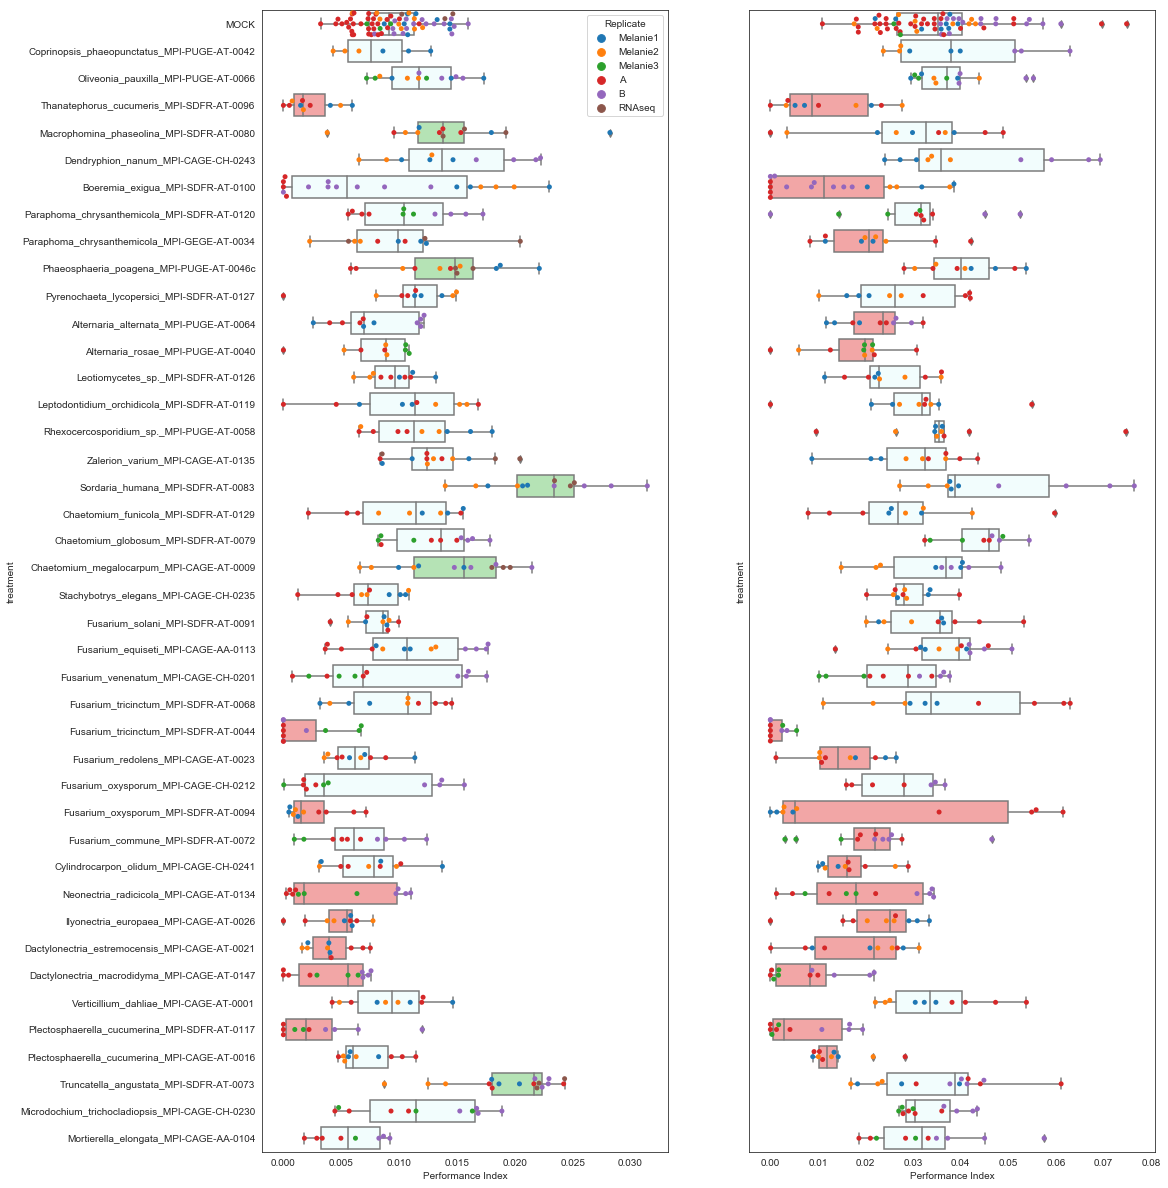

In [66]:
order=['MOCK','Coprinopsis_phaeopunctatus_MPI-PUGE-AT-0042','Oliveonia_pauxilla_MPI-PUGE-AT-0066','Thanatephorus_cucumeris_MPI-SDFR-AT-0096','Macrophomina_phaseolina_MPI-SDFR-AT-0080','Dendryphion_nanum_MPI-CAGE-CH-0243','Boeremia_exigua_MPI-SDFR-AT-0100','Paraphoma_chrysanthemicola_MPI-SDFR-AT-0120','Paraphoma_chrysanthemicola_MPI-GEGE-AT-0034','Phaeosphaeria_poagena_MPI-PUGE-AT-0046c','Pyrenochaeta_lycopersici_MPI-SDFR-AT-0127','Alternaria_alternata_MPI-PUGE-AT-0064','Alternaria_rosae_MPI-PUGE-AT-0040','Leotiomycetes_sp._MPI-SDFR-AT-0126','Leptodontidium_orchidicola_MPI-SDFR-AT-0119','Rhexocercosporidium_sp._MPI-PUGE-AT-0058','Zalerion_varium_MPI-CAGE-AT-0135','Sordaria_humana_MPI-SDFR-AT-0083','Chaetomium_funicola_MPI-SDFR-AT-0129','Chaetomium_globosum_MPI-SDFR-AT-0079','Chaetomium_megalocarpum_MPI-CAGE-AT-0009','Stachybotrys_elegans_MPI-CAGE-CH-0235','Fusarium_solani_MPI-SDFR-AT-0091','Fusarium_equiseti_MPI-CAGE-AA-0113','Fusarium_venenatum_MPI-CAGE-CH-0201','Fusarium_tricinctum_MPI-SDFR-AT-0068','Fusarium_tricinctum_MPI-SDFR-AT-0044','Fusarium_redolens_MPI-CAGE-AT-0023','Fusarium_oxysporum_MPI-CAGE-CH-0212','Fusarium_oxysporum_MPI-SDFR-AT-0094','Fusarium_commune_MPI-SDFR-AT-0072','Cylindrocarpon_olidum_MPI-CAGE-CH-0241','Neonectria_radicicola_MPI-CAGE-AT-0134','Ilyonectria_europaea_MPI-CAGE-AT-0026','Dactylonectria_estremocensis_MPI-CAGE-AT-0021','Dactylonectria_macrodidyma_MPI-CAGE-AT-0147','Verticillium_dahliae_MPI-CAGE-AT-0001','Plectosphaerella_cucumerina_MPI-SDFR-AT-0117','Plectosphaerella_cucumerina_MPI-CAGE-AT-0016','Truncatella_angustata_MPI-SDFR-AT-0073','Microdochium_trichocladiopsis_MPI-CAGE-CH-0230','Mortierella_elongata_MPI-CAGE-AA-0104']
paletteLoP={}
paletteHiP={}
lowP=lowP.rename(index=str, columns={'replicate':'Replicate','value':'Performance Index'})
highP=highP.rename(index=str, columns={'replicate':'Replicate','value':'Performance Index'})

for f in order:
    if f=='.MOCK':
        paletteLoP[f]='WhiteSmoke'
        paletteHiP[f]='WhiteSmoke'
    else:
        if f in signifPp:
            paletteHiP[f]='#ff9999'
        else:
            paletteHiP[f]='azure'
        if f in signifPm and f in ['Macrophomina_phaseolina_MPI-SDFR-AT-0080','Phaeosphaeria_poagena_MPI-PUGE-AT-0046c','Chaetomium_megalocarpum_MPI-CAGE-AT-0009','Sordaria_humana_MPI-SDFR-AT-0083','Truncatella_angustata_MPI-SDFR-AT-0073']:
            paletteLoP[f]='#adebad'
        elif f in signifPm:
            paletteLoP[f]='#ff9999'
        else:
            paletteLoP[f]='azure'

f, axes = plt.subplots(1, 2, figsize=(16,21), sharey=True)
sns.set_style("white")
sns.boxplot(y='treatment',x='Performance Index', data=lowP, order=order,ax=axes[0], palette=paletteLoP)
sns.swarmplot(y='treatment',x='Performance Index', data=lowP, order=order, hue='Replicate', hue_order=['Melanie1','Melanie2','Melanie3','A','B','RNAseq'],ax=axes[0])
sns.boxplot(y='treatment',x='Performance Index', data=highP, order=order, ax=axes[1], palette=paletteHiP)
sns.swarmplot(y='treatment',x='Performance Index', data=highP, order=order, hue='Replicate', hue_order=['Melanie1','Melanie2','Melanie3','A','B','RNAseq'], ax=axes[1])

axes[1].legend_.remove()

#plt.savefig('/biodata/dep_psl/grp_hacquard/Fantin/jgi42/figures/CompleteBoxplot.pdf')